<a href="https://colab.research.google.com/github/tkb1902/Books/blob/main/diabetes_progression_over_1_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [37]:
#load the dataset so we can understand the type of data we are dealing with
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [38]:
#print(diabetes)
#we cannot work with the data in this form so we use pandas to convert the dataset into a dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=["target"])
print(df.head())
print(target.head())



        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [39]:
#now we need to check for the cleaness and accuracy of our data and get to understand each column
df.info()
#we get to see that we have 10 columns which contain floats  and non of them contain any missing values
target.info()
#same thing here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [40]:
#now we check to see if value ranges
print(df['age'].min())
print(df['age'].max())
print(df['bmi'].min())
print(df['bmi'].max())
print(df['bp'].min())
print(df['bp'].max())
print(df['s1'].min())
print(df['s1'].max())
print(df['s2'].min())
print(df['s2'].max())
print(df['s3'].min())
print(df['s3'].max())
print(df['s4'].min())
print(df['s4'].max())
print(df['s5'].min())
print(df['s5'].max())
print(df['s6'].min())
print(df['s6'].max())


-0.1072256316073538
0.11072667545381144
-0.09027529589850945
0.17055522598064407
-0.11239880254408448
0.13204361674121307
-0.12678066991651324
0.15391371315651542
-0.11561306597939897
0.19878798965729408
-0.10230705051741597
0.18117906039727852
-0.0763945037500033
0.18523444326019867
-0.12609712083330468
0.13359728192191356
-0.13776722569000302
0.13561183068907107


In [41]:
#we can observe that our values have already been scaled
#now we need to understand our target and understand its meaning
target.describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [42]:
#the target represents the the degree of the diseases progression after year basing on those factors
#lets attempt to scale the target between 0 - 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result = scaler.fit_transform(target)
result = pd.DataFrame(result, columns=["target"])
print(result.head())


     target
0  0.392523
1  0.155763
2  0.361371
3  0.563863
4  0.342679


In [43]:
#now we need to split our data into train and test for the neural network
X_train,X_test,Y_train,Y_test= train_test_split(df,result,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 10)
(89, 10)
(353, 1)
(89, 1)


In [44]:
#after ensuring our data is ready for the neural network we now need define the network we want to use
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [45]:
#function to create model... we need to keep in my we have 10 input features and 1 output
def build_model(number_of_layers):


  if number_of_layers == 4:
     model = keras.Sequential([
            layers.Dense(64,activation ='relu',input_shape=[10]),
            layers.Dense(64,activation ='relu'),
            layers.Dense(64,activation ='relu'),
            layers.Dense(1)
  ])
    #compile the model
     model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
     return model

  if number_of_layers == 3:
     model = keras.Sequential([
           layers.Dense(64,activation ='relu',input_shape=[10]),
           layers.Dense(64,activation ='relu'),
           layers.Dense(1)
  ])
    #compile the model
     model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
     return model

  if number_of_layers == 2:
     model = keras.Sequential([
            layers.Dense(64,activation ='relu',input_shape=[10]),

            layers.Dense(1)
  ])
    #compile the model
     model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
     return model

In [46]:
#after the model is built we have to fit it with our data
def fit_model(x_train,y_train,epochs,batch_size,model):

  history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
  return history

In [47]:
#after fitting we now need to pass our test data and make the predictions
def make_predictions(x_test,model):

  predictions = model.predict(x_test)
  return predictions

In [52]:
#after making the predictions we need to evaluate the prediction made by the model against the actual data
def evaluate_model(y_test,predictions):

  mse = mean_squared_error(y_test,predictions)
  plt.scatter(y_test,predictions)

  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted Values')
  plt.show()
  return mse


In [56]:
#afterwards the next step to display the confusion matrix for the model in a graph
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')



In [62]:
def regEpochs(epochs):
    model = build_model(4)
    history = fit_model(X_train,Y_train,epochs,1,model)
    predictions = make_predictions(X_test,model)
    mse = evaluate_model(Y_test,predictions)

    return mse


def regLayer(layers):
    model = build_model(layers)
    history = fit_model(X_train,Y_train,25,1,model)
    predictions = make_predictions(X_test,model)
    mse = evaluate_model(Y_test,predictions)

    return mse


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0659 - mae: 0.1950
Epoch 2/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0294 - mae: 0.1346
Epoch 3/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 - mae: 0.1371
Epoch 4/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0288 - mae: 0.1369
Epoch 5/5
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0274 - mae: 0.1289
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


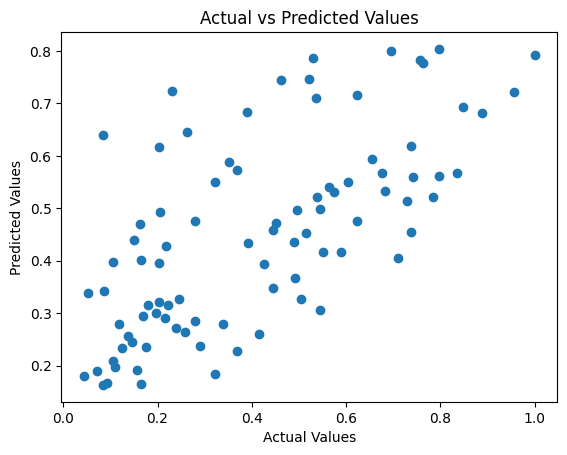

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0852 - mae: 0.2197
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0281 - mae: 0.1360
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0270 - mae: 0.1268
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0263 - mae: 0.1285
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0276 - mae: 0.1327
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 - mae: 0.1278
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0288 - mae: 0.1363
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0284 - mae: 0.1335
Epoch 9/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0315 - mae: 0.1431
Epoch 10/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0278 - mae: 0.1312
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


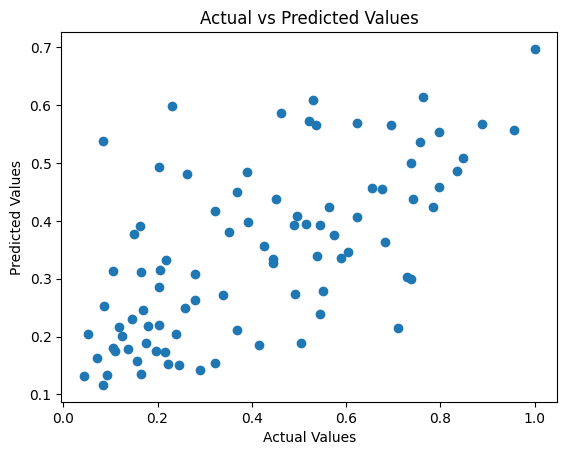

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0551 - mae: 0.1845
Epoch 2/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0315 - mae: 0.1413
Epoch 3/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0247 - mae: 0.1249
Epoch 4/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0281 - mae: 0.1347
Epoch 5/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0266 - mae: 0.1275
Epoch 6/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0272 - mae: 0.1291
Epoch 7/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0267 - mae: 0.1277
Epoch 8/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0244 - mae: 0.1221
Epoch 9/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0243 - mae: 0.1212
Epoch 10/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0269 - mae: 0.1259
Epoch 11/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0237 - mae: 0.1203
Epoch 12/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0239 - mae: 0.1219
Epoch 13/25
353/353 ━━━━━━━━━━━━━━━━

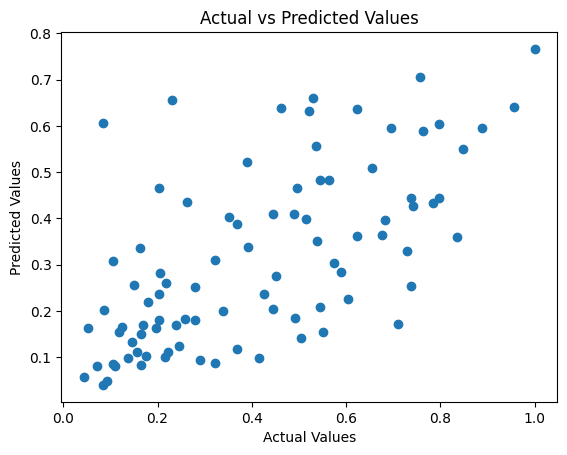

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0559 - mae: 0.1834
Epoch 2/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0283 - mae: 0.1332
Epoch 3/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0258 - mae: 0.1278
Epoch 4/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0300 - mae: 0.1387
Epoch 5/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0254 - mae: 0.1253
Epoch 6/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0265 - mae: 0.1313
Epoch 7/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0291 - mae: 0.1365
Epoch 8/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0262 - mae: 0.1306
Epoch 9/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0237 - mae: 0.1220
Epoch 10/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0253 - mae: 0.1234
Epoch 11/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0254 - mae: 0.1238
Epoch 12/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0256 - mae: 0.1242
Epoch 13/50
353/353 ━━━━━━━━━━━━━━━━

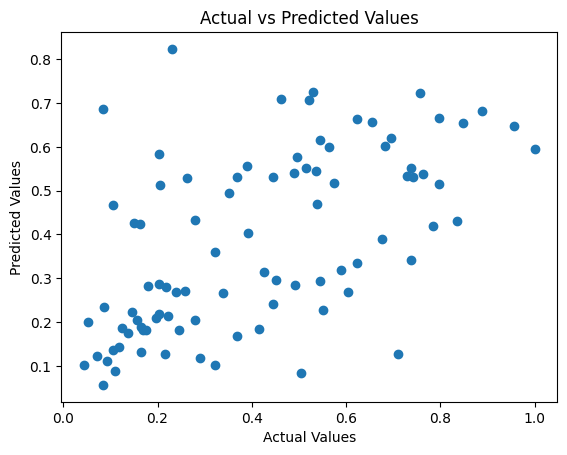

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0829 - mae: 0.2195
Epoch 2/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0311 - mae: 0.1422
Epoch 3/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0275 - mae: 0.1332
Epoch 4/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0255 - mae: 0.1263
Epoch 5/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 - mae: 0.1299
Epoch 6/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0253 - mae: 0.1277
Epoch 7/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0249 - mae: 0.1276
Epoch 8/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0231 - mae: 0.1196
Epoch 9/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0252 - mae: 0.1257
Epoch 10/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0255 - mae: 0.1268
Epoch 11/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0203 - mae: 0.1121
Epoch 12/75
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0268 - mae: 0.1322
Epoch 13/75
353/353 ━━━━━━━━━━━━━━━━

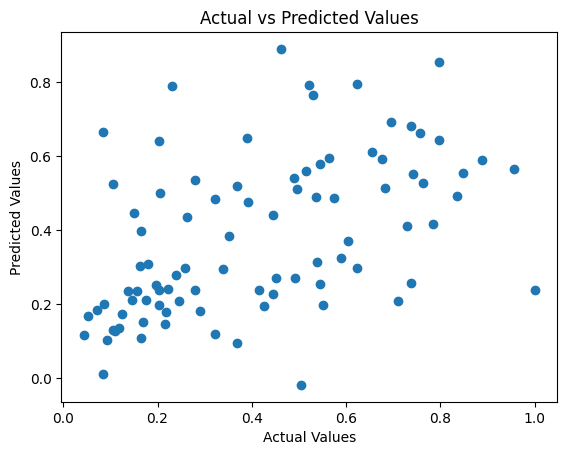

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0567 - mae: 0.1892
Epoch 2/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0286 - mae: 0.1360
Epoch 3/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0277 - mae: 0.1313
Epoch 4/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0312 - mae: 0.1416
Epoch 5/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0251 - mae: 0.1227
Epoch 6/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0258 - mae: 0.1269
Epoch 7/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0304 - mae: 0.1399
Epoch 8/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0281 - mae: 0.1349
Epoch 9/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 - mae: 0.1201
Epoch 10/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0285 - mae: 0.1348
Epoch 11/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0265 - mae: 0.1284
Epoch 12/100
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0240 - mae: 0.1189
Epoch 13/100
353/353 ━━━━

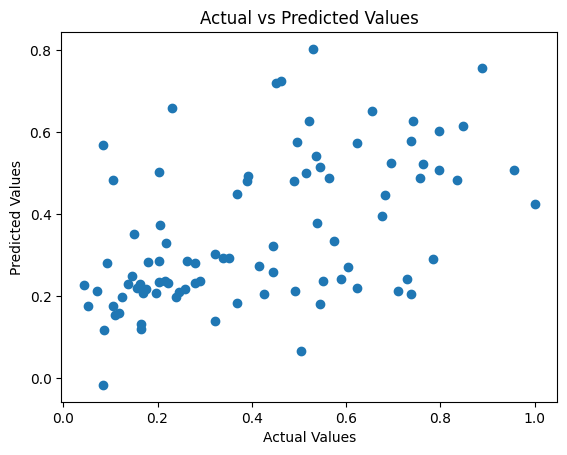

[0.03561428855240598, 0.04053731594723566, 0.04651398192730678, 0.045893999090325086, 0.0559341191057092, 0.05123456742396261]


In [63]:
#this is an effort to get a better understanding of epochs number influence on errors which all other variable remaining constant
errors = []
errors.append(regEpochs(5))
errors.append(regEpochs(10))
errors.append(regEpochs(25))
errors.append(regEpochs(50))
errors.append(regEpochs(75))
errors.append(regEpochs(100))
print(errors)



Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - loss: 0.0650 - mae: 0.2041
Epoch 2/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0298 - mae: 0.1397
Epoch 3/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0307 - mae: 0.1398
Epoch 4/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 0.0279 - mae: 0.1360
Epoch 5/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 0.0264 - mae: 0.1317
Epoch 6/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - loss: 0.0310 - mae: 0.1385
Epoch 7/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 0.0228 - mae: 0.1218
Epoch 8/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0268 - mae: 0.1263
Epoch 9/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0240 - mae: 0.1238
Epoch 10/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0252 - mae: 0.1281
Epoch 11/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0231 - mae: 0.1213
Epoch 12/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0261 - mae: 0.1273
Epoch 13/25
353/353 ━━

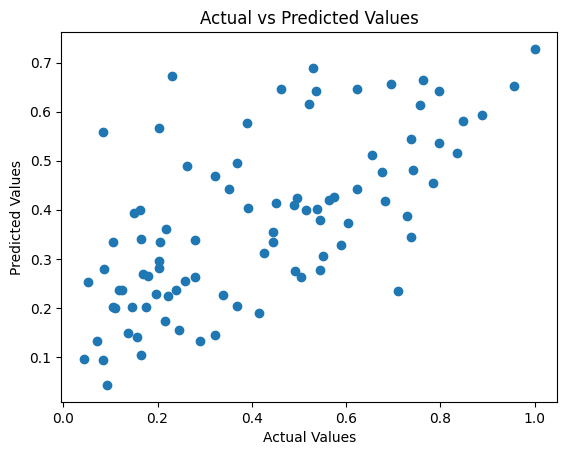

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0635 - mae: 0.2008
Epoch 2/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0292 - mae: 0.1387
Epoch 3/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0263 - mae: 0.1335
Epoch 4/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0267 - mae: 0.1308
Epoch 5/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0215 - mae: 0.1139
Epoch 6/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0269 - mae: 0.1278
Epoch 7/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0260 - mae: 0.1238
Epoch 8/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0250 - mae: 0.1251
Epoch 9/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0245 - mae: 0.1241
Epoch 10/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - loss: 0.0267 - mae: 0.1299
Epoch 11/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0258 - mae: 0.1278
Epoch 12/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0252 - mae: 0.1273
Epoch 13/25
353/353 ━━━━━━━━━━━━━━

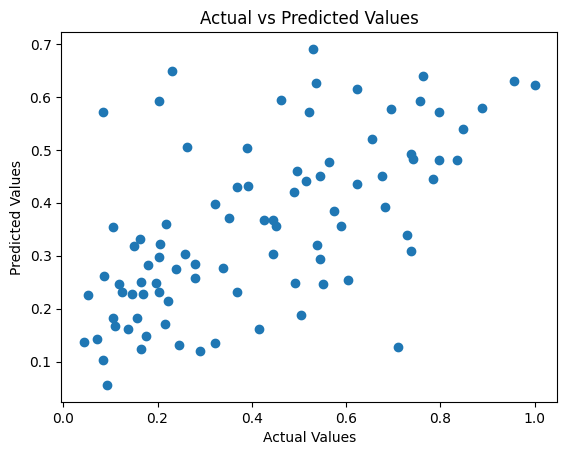

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


353/353 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0666 - mae: 0.1989
Epoch 2/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0332 - mae: 0.1479
Epoch 3/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0269 - mae: 0.1281
Epoch 4/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0258 - mae: 0.1262
Epoch 5/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0284 - mae: 0.1324
Epoch 6/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0240 - mae: 0.1240
Epoch 7/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0296 - mae: 0.1379
Epoch 8/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0223 - mae: 0.1183
Epoch 9/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0250 - mae: 0.1237
Epoch 10/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0235 - mae: 0.1179
Epoch 11/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0227 - mae: 0.1165
Epoch 12/25
353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0241 - mae: 0.1172
Epoch 13/25
353/353 ━━━━━━━━━━━━━━━━

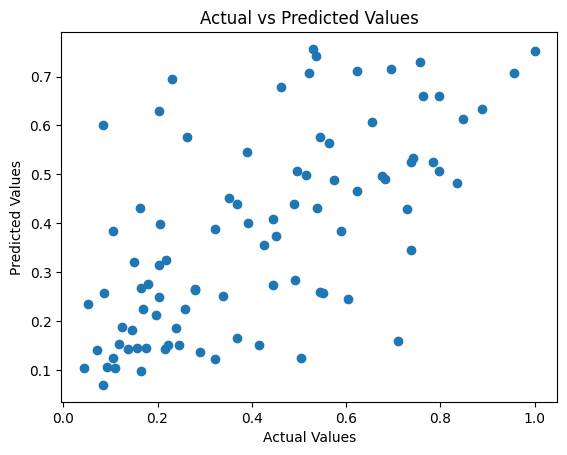

[0.03664934166404888, 0.0415848518267412, 0.0384674937424643]


In [64]:
#effort to understand the impact of hidden layer with constant number of epochs at 25
fatals= []
fatals.append(regLayer(2))
fatals.append(regLayer(3))
fatals.append(regLayer(4))
print(fatals)